In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import ast

# Read data from csv

In [6]:
df = pd.read_csv('courses_DS.csv')
print(df.dtypes)
df.head()

name                      object
slug                      object
domain1                   object
subdomain1                object
domain2                   object
subdomain2                object
description               object
startDate                  int64
partnerIds                object
instructorIds             object
primaryLanguages          object
subtitleLanguages         object
specializations           object
certificates              object
courseType                object
id                        object
s12nIds                   object
stars                    float64
ratings_count            float64
num_enrolled             float64
difficulty                object
length                   float64
ins_stars                float64
ins_ratings_count        float64
ins_learners_count       float64
ins_courses_count        float64
content_rating            object
content_ratings_count    float64
dtype: object


,name,slug,domain1,subdomain1,domain2,subdomain2,description,startDate,partnerIds,instructorIds,...,ratings_count,num_enrolled,difficulty,length,ins_stars,ins_ratings_count,ins_learners_count,ins_courses_count,content_rating,content_ratings_count
0,Dealing With Missing Data,missing-data,data-science,data-analysis,social-sciences,governance-and-society,This course will cover the steps used in weigh...,1471901099812,['32'],['8394050'],...,119.0,10404.0,NaN,18.0,3.57,7.0,13999.0,5.0,NaN,NaN
1,Cluster Analysis using RCmdr,cluster-analysis-rcmdr,data-science,data-analysis,NaN,NaN,"In this 1-hour long project-based course, we w...",1601055478420,['565'],['70333041'],...,NaN,NaN,NaN,NaN,NaN,NaN,3340.0,NaN,NaN,NaN
2,Performing Data Aggregation using SQL Aggregat...,performing-data-aggregation-using-sql-aggregat...,data-science,data-analysis,information-technology,data-management,"In this 2-hour long project-based course, you ...",1597188408088,['565'],['40353561'],...,58.0,2657.0,NaN,NaN,NaN,NaN,20863.0,NaN,NaN,NaN
3,Getting Started with AWS Machine Learning,aws-machine-learning,data-science,machine-learning,computer-science,software-development,Machine learning (ML) is one of the fastest gr...,1568841469010,['338'],['37525971'],...,6218.0,191477.0,Intermediate Level,9.0,4.53,1809.0,453721.0,5.0,94%,9896.0
4,Social Network Analysis,social-network-analysis,data-science,data-analysis,social-sciences,education,This course is designed to quite literally ‘ma...,1576005639598,['83'],['1503466'],...,179.0,11250.0,Beginner Level,10.0,4.78,49.0,36006.0,5.0,NaN,NaN


# Merge instructor and partner names

In [53]:
# merge instructor names from the instructors_DS dataset

instructors = pd.read_csv('instructors_DS.csv')
instructors = instructors.astype({"instructorId":str})
print(instructors.head())
print(instructors.dtypes)
inst_dict = instructors.set_index("instructorId").to_dict().get("instructorName")

def helperi(row):
    inst_ids = row["instructorIds"]
    instnamelist = []
    for inst in inst_ids:
        inst_name = inst_dict.get(inst)
        instnamelist.append(inst_name)
    return instnamelist
df["instructorNames"] = df.apply(helperi, axis=1)
df[["instructorIds","instructorNames"]]

                 instructorName instructorId
0                   Brian Walsh     77620729
1                   Emily Ellis      3259066
2  Harold P. Lehmann, MD, Ph.D.       678654
3                   Brian Casey     29515160
4      Vicente Hinojosa Alarcón      2636979
instructorName    object
instructorId      object
dtype: object


,instructorIds,instructorNames
0,[8394050],"[Richard Valliant, Ph.D.]"
1,[70333041],[Shalini Gopalkrishnan ]
2,[40353561],[Arimoro Olayinka Imisioluwa]
3,[37525971],[Blaine Sundrud]
4,[1503466],[Martin Hilbert]
...,...,...
1848,[70002989],[Bhagesh Hunakunti]
1849,"[10261328, 42510508]","[Laurence Moroney, Eddy Shyu]"
1850,[9349877],[Anna Koop]
1851,[88710258],[Emmanuel Acheampong]


In [ ]:
# merge partner names from the partners_DS dataset

partners = pd.read_csv('partners_DS.csv')
partners = partners.astype({"partnerId":str})
print(partners.head())
print(partners.dtypes)
part_dict = partners.set_index("partnerId").to_dict().get("partnerName")
part_short_dict = partners.set_index("partnerId").to_dict().get("partnerShortName")

def helperp1(row):
    part_ids = row["partnerIds"]
    partnamelist = []
    for part in part_ids:
        part_name = part_dict.get(part)
        partnamelist.append(part_name)
    return partnamelist

def helperp2(row):
    part_ids = row["partnerIds"]
    print(type(part_ids))
    partshortnamelist = []
    for part in part_ids:
        print(part)
        part_short_name = part_short_dict.get(part)
        partshortnamelist.append(part_short_name)
    return partshortnamelist

df["partnerIds"] = df["partnerIds"].apply(lambda s: ast.literal_eval(s))
df["partnerNames"] = df.apply(helperp1, axis=1)
df["partnerShortNames"] = df.apply(helperp2, axis=1)
df[["partnerIds","partnerNames","partnerShortNames"]]

In [66]:
# Reorder column names
cols = ['name', 'slug', 'domain1', 'subdomain1', 'domain2', 'subdomain2', 'description', 'startDate', 'partnerIds', 'partnerNames', 'partnerShortNames', 'instructorIds', 'instructorNames', 'primaryLanguages', 'subtitleLanguages', 'specializations', 'certificates', 'courseType', 'id', 's12nIds', 'stars', 'ratings_count', 'num_enrolled', 'difficulty', 'length', 'ins_stars', 'ins_ratings_count', 'ins_learners_count', 'ins_courses_count', 'content_rating', 'content_ratings_count']
df = df[cols]
df.head()

,name,slug,domain1,subdomain1,domain2,subdomain2,description,startDate,partnerIds,partnerNames,...,ratings_count,num_enrolled,difficulty,length,ins_stars,ins_ratings_count,ins_learners_count,ins_courses_count,content_rating,content_ratings_count
0,Dealing With Missing Data,missing-data,data-science,data-analysis,social-sciences,governance-and-society,This course will cover the steps used in weigh...,1471901099812,[32],"[University of Maryland, College Park]",...,119.0,10404.0,NaN,18.0,3.57,7.0,13999.0,5.0,NaN,NaN
1,Cluster Analysis using RCmdr,cluster-analysis-rcmdr,data-science,data-analysis,NaN,NaN,"In this 1-hour long project-based course, we w...",1601055478420,[565],[Coursera Project Network],...,NaN,NaN,NaN,NaN,NaN,NaN,3340.0,NaN,NaN,NaN
2,Performing Data Aggregation using SQL Aggregat...,performing-data-aggregation-using-sql-aggregat...,data-science,data-analysis,information-technology,data-management,"In this 2-hour long project-based course, you ...",1597188408088,[565],[Coursera Project Network],...,58.0,2657.0,NaN,NaN,NaN,NaN,20863.0,NaN,NaN,NaN
3,Getting Started with AWS Machine Learning,aws-machine-learning,data-science,machine-learning,computer-science,software-development,Machine learning (ML) is one of the fastest gr...,1568841469010,[338],[Amazon Web Services],...,6218.0,191477.0,Intermediate Level,9.0,4.53,1809.0,453721.0,5.0,94%,9896.0
4,Social Network Analysis,social-network-analysis,data-science,data-analysis,social-sciences,education,This course is designed to quite literally ‘ma...,1576005639598,[83],"[University of California, Davis]",...,179.0,11250.0,Beginner Level,10.0,4.78,49.0,36006.0,5.0,NaN,NaN


# Convert data types

In [104]:
# convert count numbers to int (failed because of nan values)
df = df.astype({"ratings_count":int, "num_enrolled":int, "ins_ratings_count":int, "ins_learners_count":int, "ins_courses_count": int, "content_ratings_count":int}, errors="ignore")

In [70]:
# convert startdate from unix milliseconds to standard datetime
df["startDate"] = pd.to_datetime(df['startDate'], unit='ms')

In [161]:
# course age in days
import datetime
df["age"] = df["startDate"].apply(lambda x: (datetime.date(year=2022,month=5,day=22)- x.date()).days)

In [111]:
# convert primary language
df["primaryLanguages"] = df["primaryLanguages"].apply(lambda s: ast.literal_eval(s)[0])

In [ ]:
# replaces certificates with two dummies for verified certificate and specialization
df["certificates"] = df["certificates"].apply(lambda s: ast.literal_eval(s))
df["verified_cert"] = ("VerifiedCert" in df["certificates"])
df["specialization"] = ("Specialization" in df["certificates"]) # replaces the empty column "specialization"
df.drop(columns=["certificates"])

In [120]:
# count number of instructors
df["num_instructors"]=df["instructorIds"].apply(lambda x: len(x))

In [162]:
print(df.dtypes)
df.head(10)

name                             object
slug                             object
domain1                          object
subdomain1                       object
domain2                          object
subdomain2                       object
description                      object
startDate                datetime64[ns]
partnerIds                       object
partnerNames                     object
partnerShortNames                object
instructorIds                    object
instructorNames                  object
primaryLanguages                 object
subtitleLanguages                object
specializations                  object
certificates                     object
courseType                       object
id                               object
s12nIds                          object
stars                           float64
ratings_count                   float64
num_enrolled                    float64
difficulty                       object
length                          float64


,name,slug,domain1,subdomain1,domain2,subdomain2,description,startDate,partnerIds,partnerNames,...,num_instructors,python_yn,sql_yn,ml_yn,dl_nn_yn,rstudio_yn,excel_yn,tensorflow_yn,googcloud_yn,age
0,Dealing With Missing Data,missing-data,data-science,data-analysis,social-sciences,governance-and-society,This course will cover the steps used in weigh...,2016-08-22 21:24:59.812,[32],"[University of Maryland, College Park]",...,1,0,0,0,0,0,0,0,0,2099
1,Cluster Analysis using RCmdr,cluster-analysis-rcmdr,data-science,data-analysis,NaN,NaN,"In this 1-hour long project-based course, we w...",2020-09-25 17:37:58.420,[565],[Coursera Project Network],...,1,0,0,0,0,0,0,0,0,604
2,Performing Data Aggregation using SQL Aggregat...,performing-data-aggregation-using-sql-aggregat...,data-science,data-analysis,information-technology,data-management,"In this 2-hour long project-based course, you ...",2020-08-11 23:26:48.088,[565],[Coursera Project Network],...,1,0,1,0,0,0,0,0,0,649
3,Getting Started with AWS Machine Learning,aws-machine-learning,data-science,machine-learning,computer-science,software-development,Machine learning (ML) is one of the fastest gr...,2019-09-18 21:17:49.010,[338],[Amazon Web Services],...,1,0,0,1,0,0,0,0,0,977
4,Social Network Analysis,social-network-analysis,data-science,data-analysis,social-sciences,education,This course is designed to quite literally ‘ma...,2019-12-10 19:20:39.598,[83],"[University of California, Davis]",...,1,0,0,0,0,0,0,0,0,894
5,Computer Vision Basics,computer-vision-basics,computer-science,algorithms,data-science,machine-learning,"By the end of this course, learners will under...",2019-04-15 14:40:07.762,"[458, 117]","[University at Buffalo, The State University o...",...,2,0,0,0,0,0,0,0,0,1133
6,Analyze Box Office Data with Seaborn and Python,analyze-data-seaborn-python,data-science,machine-learning,data-science,data-analysis,Welcome to this project-based course on Analyz...,2020-02-19 03:20:40.897,[565],[Coursera Project Network],...,1,1,0,0,0,0,0,0,0,823
7,Code Free Data Science,code-free-data-science,data-science,machine-learning,data-science,data-analysis,The Code Free Data Science class is designed f...,2019-03-21 16:58:03.970,[53],[University of California San Diego],...,1,0,0,1,0,0,0,0,0,1158
8,Accounting Analytics,accounting-analytics,business,finance,data-science,data-analysis,Accounting Analytics explores how financial st...,2016-01-09 00:49:46.134,[6],[University of Pennsylvania],...,2,0,0,0,0,0,0,0,0,2325
9,"Extract, Transform, and Load Data",extract-transform-and-load-data,data-science,data-analysis,data-science,machine-learning,This course is designed for business and data ...,2021-10-15 15:17:23.240,[639],[CertNexus],...,3,0,0,0,0,0,0,0,0,219


# Parse course descriptions

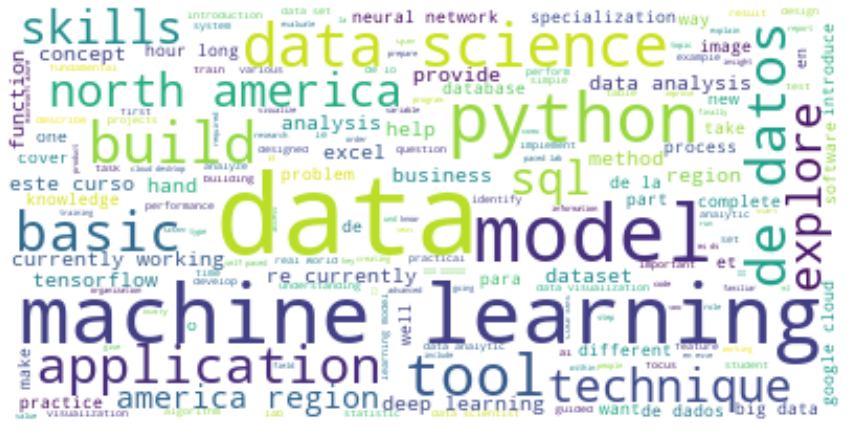

In [131]:
# generate a word cloud
import wordcloud
text = " ".join(i.lower() for i in df["description"])
stop_words = ["course", "project", "will", "learn", "use", "using", "able", "end", "understand", "learner", "learners", "based", "need", "experience", "work", "used", "currently working", "skill", "create", "providing", "apply", "Note", "e", "y", "ll", "works", "best", "including"] + list(wordcloud.STOPWORDS)
wordcloud = wordcloud.WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [134]:
# word frequency in a list
text_dictionary = wordcloud.process_text(text)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
print(list(word_freq.items())[:100])

[('data', 1532), ('machine learning', 841), ('model', 744), ('python', 537), ('data science', 402), ('tool', 383), ('build', 352), ('de datos', 332), ('basic', 326), ('application', 309), ('technique', 289), ('sql', 287), ('north america', 285), ('skills', 284), ('explore', 283), ('america region', 283), ('currently working', 283), ('analysis', 276), ('re currently', 275), ('concept', 273), ('hand', 273), ('dataset', 271), ('business', 266), ('excel', 264), ('method', 263), ('data analysis', 263), ('region', 262), ('help', 251), ('function', 246), ('tensorflow', 245), ('este curso', 237), ('provide', 236), ('deep learning', 235), ('specialization', 234), ('different', 219), ('o', 218), ('hour long', 216), ('knowledge', 214), ('process', 210), ('well', 209), ('de', 208), ('image', 207), ('practice', 204), ('take', 204), ('want', 201), ('new', 201), ('neural network', 196), ('google cloud', 195), ('software', 194), ('one', 194), ('cover', 193), ('problem', 192), ('de la', 190), ('make', 

In [135]:
# parse the most popular DS skills as dummies
df["python_yn"] = df["description"].apply(lambda x: 1 if "python" in x.lower() else 0)
df["sql_yn"] = df["description"].apply(lambda x: 1 if "sql" in x.lower() else 0)
df["ml_yn"] = df["description"].apply(lambda x: 1 if "machine learning" in x.lower() else 0)
df["dl_nn_yn"] = df["description"].apply(lambda x: 1 if "deep learning" in x.lower() or "neural network" in x.lower() else 0)
df["rstudio_yn"] = df["description"].apply(lambda x: 1 if "r studio" in x.lower() or "r-studio" in x.lower() else 0)
df["excel_yn"] = df["description"].apply(lambda x: 1 if "excel" in x.lower() else 0)
df["tensorflow_yn"] = df["description"].apply(lambda x: 1 if "tensorflow" in x.lower() else 0)
df["googcloud_yn"] = df["description"].apply(lambda x: 1 if "google cloud" in x.lower() else 0)

In [139]:
df[["python_yn","sql_yn","ml_yn","dl_nn_yn","rstudio_yn","excel_yn","tensorflow_yn","googcloud_yn"]].head()

,python_yn,sql_yn,ml_yn,dl_nn_yn,rstudio_yn,excel_yn,tensorflow_yn,googcloud_yn
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [163]:
df.to_csv('courses_DS_cleaned.csv', index=False)